In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 44)

In [3]:
siniestros = pd.read_csv("https://raw.githubusercontent.com/danielcaba889/Car-insurance-claim-prediction/main/Car%20insurance%20claims.csv")
siniestros.head(15)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.60,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.60,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.60,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.80,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.00,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
5,ID00006,1.018709,0.07,0.519231,C6,13051,3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6,Yes,Yes,Yes,Yes,Yes,Disc,1493,4,Automatic,6,Power,5.20,4300,1790,1635,1720,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
6,ID00007,0.097992,0.16,0.403846,C7,6112,4,B2,M5,Diesel,200Nm@3000rpm,88.77bhp@4000rpm,1.5 Turbocharged Revotorq,2,No,Yes,No,Yes,No,Drum,1497,4,Manual,5,Electric,5.00,3990,1755,1523,1490,No,No,No,No,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0
7,ID00008,0.509085,0.14,0.423077,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,5,Electric,4.80,3845,1735,1530,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
8,ID00009,0.282394,0.07,0.298077,C7,6112,3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6,Yes,Yes,Yes,Yes,Yes,Disc,1493,4,Automatic,6,Power,5.20,4300,1790,1635,1720,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
9,ID00010,0.566255,0.04,0.442308,C9,17804,1,B2,M7,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K Series Engine,6,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.85,3990,1745,1500,1410,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0,0


# Matplotlib

In [4]:
colors_by_model = {'M1': 'red',
'M2': "green",
'M3': 'Blue',
'M4': 'Yellow',
'M5': 'Orange',
'M6': 'Purple',
'M7': 'Pink',
'M8': 'Cyan',
'M9': 'Brown',
'M10': 'Teal',
'M11': 'Gray'}


color_for_plot = []
for model in siniestros['model']:
  color = colors_by_model.get(model)
  color_for_plot.append(color)

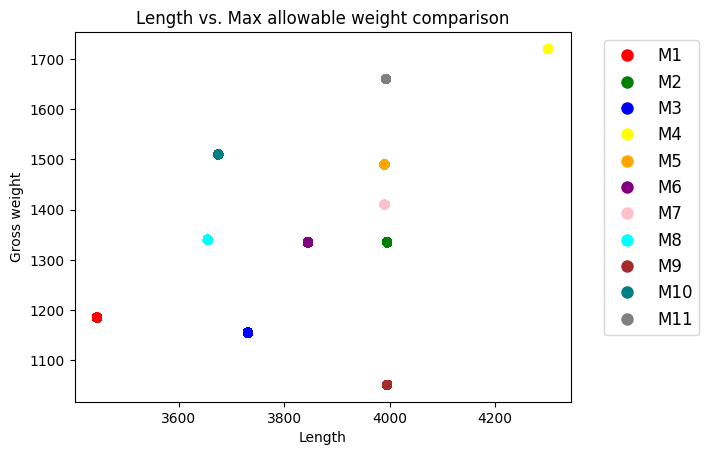

In [23]:
plt.scatter(data = siniestros, x = 'length', y = 'gross_weight', c = color_for_plot)
plt.xlabel('Length')
plt.ylabel('Gross weight')
plt.title("Length vs. Max allowable weight comparison")
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors_by_model[model], markersize=10, label=model) for model in colors_by_model.keys()]
plt.legend(handles=legend_elements, fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

En el gráfico se puede visualizar que existe una correlación positiva entre el largo del vehículo y el peso máximo permitido total del vehículo incluyendo pasajeros, y equipamiento.
Adicionalmente, observamos que el modelo M4, representado por el punto amarillo, es el modelo que tiene mayor longitud y peso permitido

In [6]:
siniestros["fuel_type"].unique()

array(['CNG', 'Petrol', 'Diesel'], dtype=object)

In [7]:
siniestros["fuel_type"].value_counts()

Petrol    20532
CNG       20330
Diesel    17730
Name: fuel_type, dtype: int64

In [8]:
siniestros["gear_box"].value_counts()

5    44211
6    14381
Name: gear_box, dtype: int64

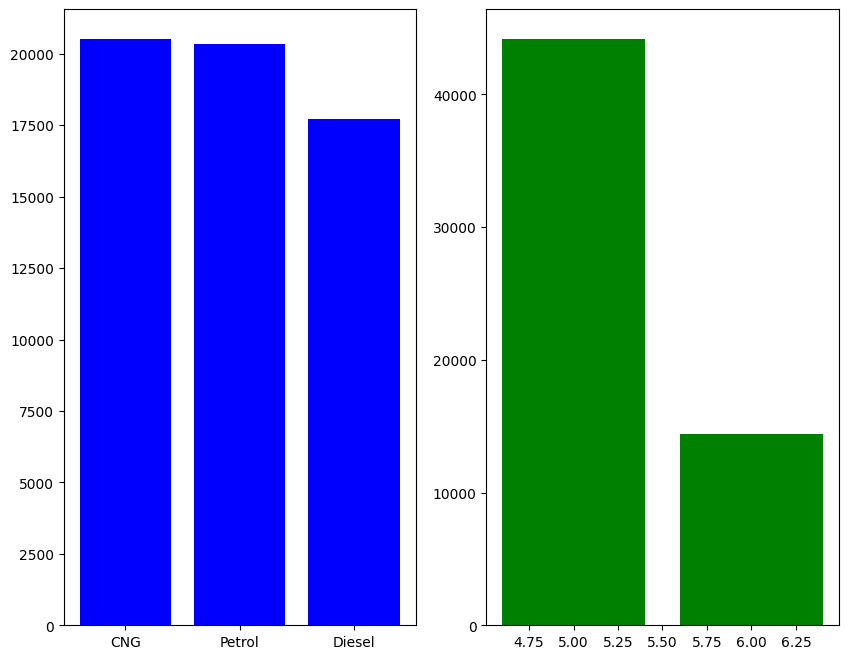

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

ax1.bar(x = siniestros["fuel_type"].unique(), height = siniestros["fuel_type"].value_counts(), color = 'blue')
ax2.bar(x = siniestros["gear_box"].unique(), height = siniestros["gear_box"].value_counts(), color = 'green')

plt.show()

De acuerdo a lo observado, se puede concluir que la mayoría de los vehículos usan GAS y NAFTA, mientras que la minoría (pero no por mucho) utiliza el tipo Diesel.

Por otro lado, la gran mayoría de los coches utilizan una caja de cambios de 5 engranajes, salvo algunas exclusiones de vehículos que utilizan 6.

In [10]:
pd.set_option('display.max_columns', 46)
siniestros.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [11]:
brake_assist_values = siniestros['is_brake_assist'].unique()
summary_brake_assist = siniestros.groupby(['is_brake_assist', 'is_claim']).count()['policy_id']


transmission_type_values = siniestros['transmission_type'].unique()
summary_transmission_type = siniestros.groupby(['transmission_type', 'is_claim']).count()['policy_id']


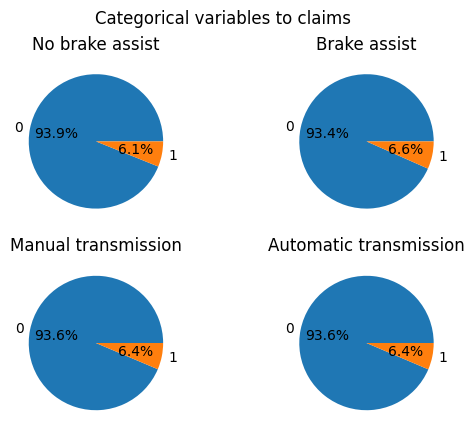

In [12]:
figure, axis = plt.subplots(2, 2)

axis[0,0].pie(summary_brake_assist['No'],labels = [0,1],autopct='%1.1f%%')
axis[0,1].pie(summary_brake_assist['Yes'],labels = [0,1],autopct='%1.1f%%')


axis[1,0].pie(summary_transmission_type['Manual'],labels = [0,1],autopct='%1.1f%%')
axis[1,1].pie(summary_transmission_type['Automatic'],labels = [0,1],autopct='%1.1f%%')

axis[0, 0].set_title("No brake assist")
axis[0, 1].set_title("Brake assist")
axis[1, 0].set_title("Manual transmission")
axis[1, 1].set_title("Automatic transmission")

plt.suptitle("Categorical variables to claims")

plt.show()

Pie chart para comparar aquellos vehículos que poseen asistencia de freno.
No se puede concluir que los que tienen asistencia de freno tengan menos reclamos.
Mismo análisis para transmisión manual/automática

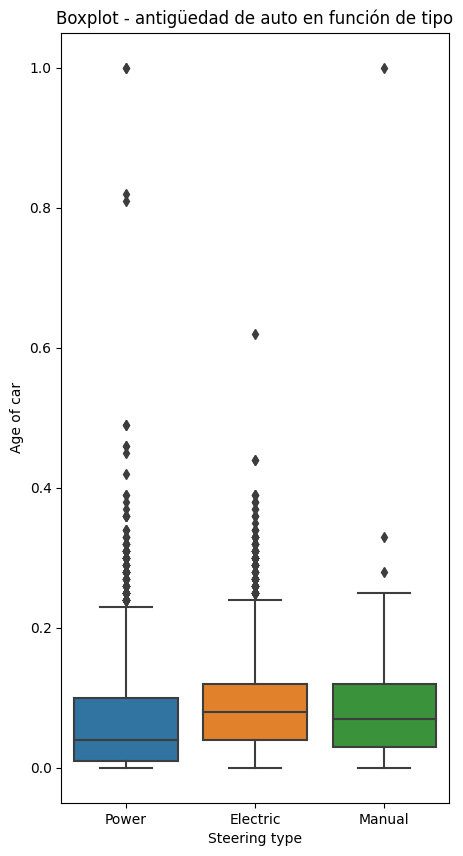

In [13]:
ax, fig = plt.subplots(figsize = (5,10))
sns.boxplot(data = siniestros , y = "age_of_car", x = "steering_type")
plt.title('Boxplot - antigüedad de auto en función de tipo')
plt.xlabel('Steering type')
plt.ylabel('Age of car')
plt.show()

Aquellos autos de tipo eléctrico tienen una mediana de antigüedad de auto mayor al resto.
Por otro lado, la categoría Power presenta mayor cantidad de valores extremos, al hablar de antigüedad del vehículo. Sin embargo, posee los valores mas bajos en sus cuantiles.


In [14]:
#fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 1)
#sns.histplot(data = siniestros, x = "age_of_policyholder", hue = 'is_claim', stat = 'density')


#SEABORN

<Axes: xlabel='age_of_policyholder', ylabel='Density'>

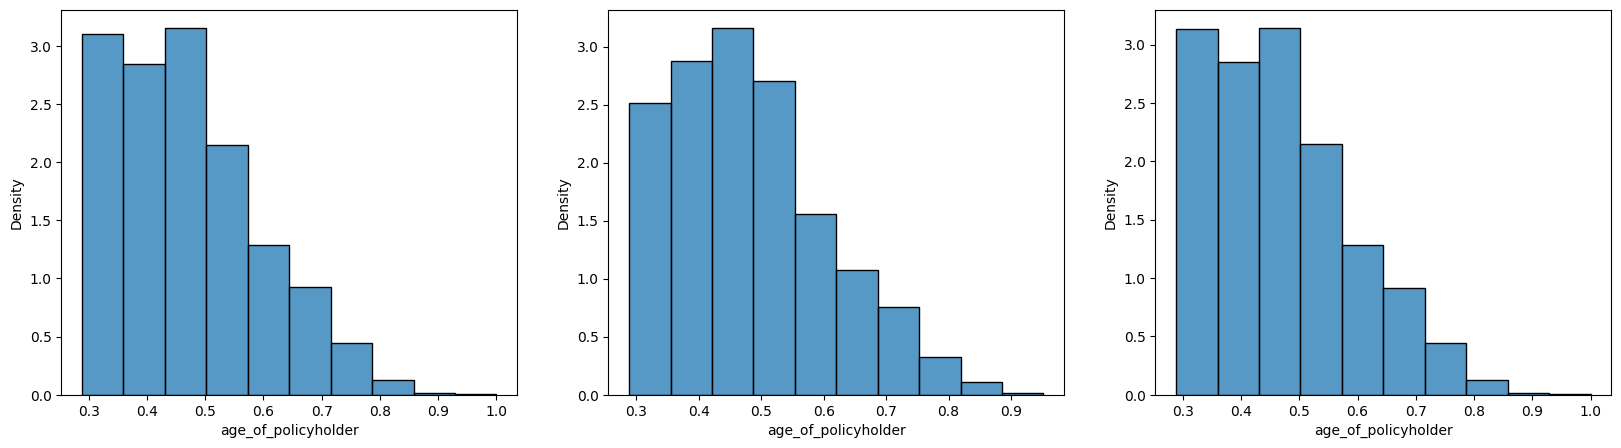

In [15]:
figure, axis = plt.subplots(1,3, figsize = (20,5))
sns.histplot(data = siniestros, x = "age_of_policyholder", stat = 'density', bins = 10, ax = axis[0])
sns.histplot(data = siniestros [siniestros["is_claim"] == 1], x = "age_of_policyholder", stat = 'density', bins = 10, ax = axis[1])
sns.histplot(data = siniestros [siniestros["is_claim"] == 0], x = "age_of_policyholder", stat = 'density', bins = 10, ax = axis[2])

In [16]:
siniestros.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


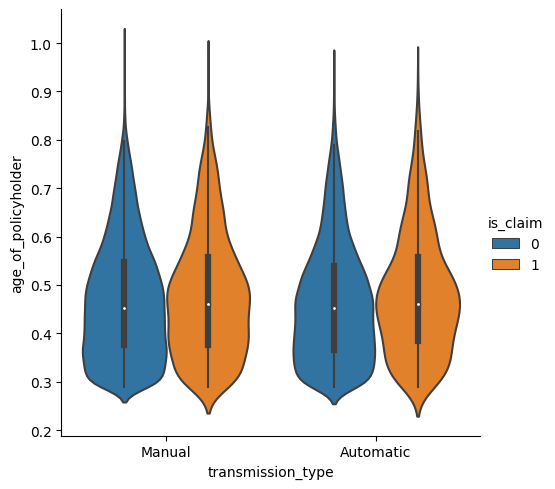

In [17]:
sns.catplot(data = siniestros, x = 'transmission_type', y = 'age_of_policyholder', kind = 'violin', hue = 'is_claim')

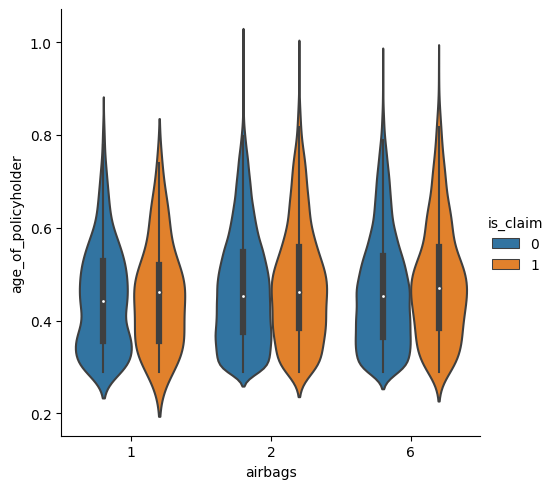

In [18]:
sns.catplot(data = siniestros, x = 'airbags', y = 'age_of_policyholder', kind = 'violin', hue = 'is_claim')

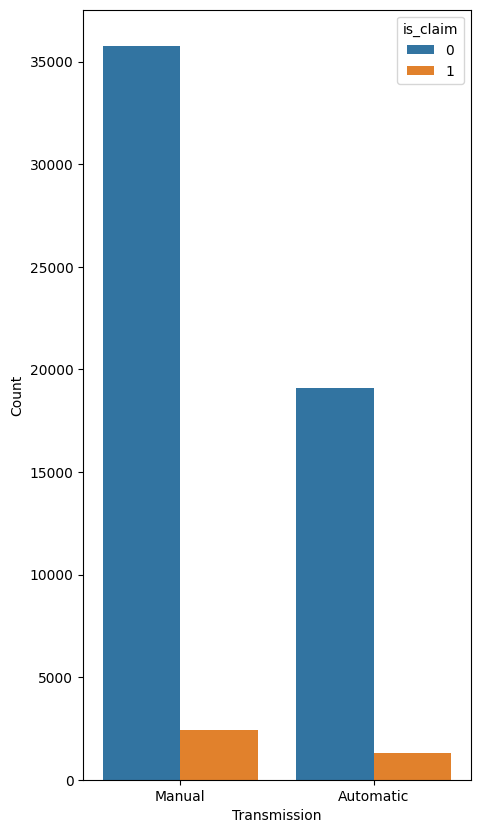

In [19]:
plt.figure(figsize=(5, 10))

sns.countplot(data = siniestros, x = 'transmission_type', hue = 'is_claim')
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.show()

Es interesante saber si aquellos que tienen transmisión manual son más proclives a realizar un reclamo por siniestro, sin embargo en lo que observamos en el gráfico de barras, vemos que la cantidad de reclamos por vehículos con transmisión manual es más alto que los automáticos. No podemos concluir que es una variable que influye, ya que la cantidad de autos con transmisión manual son muchos más, por lo tanto es lógico que también lo sean los reclamos.